In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [5]:
df = pd.read_csv('frmgham_clean.csv', index_col=0)

In [6]:
df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [4]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('CVD', axis=1)
y = df['CVD']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [13]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [14]:
preds = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [16]:
confusion_matrix(y_test,preds)

array([[2524,    4],
       [   0,  829]])

/Users/JoeMcLaughlin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


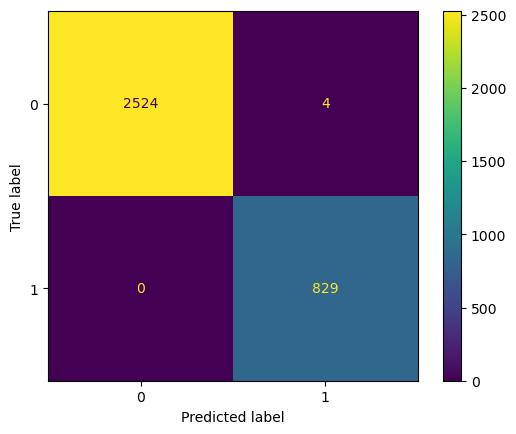

In [17]:
plot_confusion_matrix(model,X_test,y_test)

In [18]:
model.feature_importances_

array([4.91239570e-03, 6.35333498e-04, 3.95693286e-03, 3.60064282e-03,
       5.33225272e-03, 2.88201298e-03, 1.62770176e-04, 1.39402477e-03,
       4.38541546e-03, 1.29285803e-04, 6.38155637e-04, 3.60108180e-03,
       3.54598798e-03, 1.30390051e-03, 3.60779392e-03, 3.66989217e-03,
       1.15073766e-02, 6.73942062e-03, 3.06802082e-04, 1.42162470e-03,
       7.74985582e-04, 1.76217419e-02, 6.88959439e-03, 8.66952449e-02,
       1.03691686e-01, 1.61433974e-01, 1.28251627e-01, 1.75236357e-03,
       3.13770440e-02, 1.51693392e-02, 2.68978066e-02, 1.72584279e-02,
       5.93411489e-02, 2.56778455e-01, 1.66399650e-02, 5.69349212e-03])

In [19]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

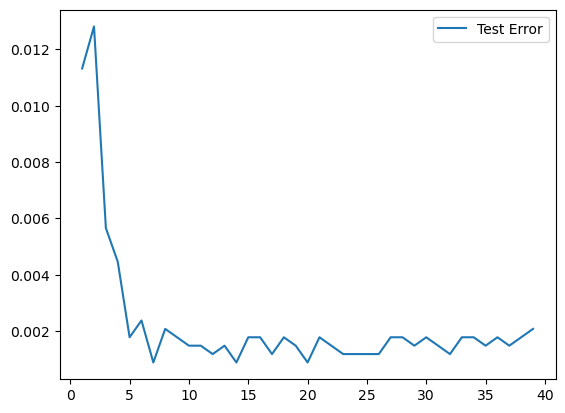

In [20]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()